Mounting Drive

In [1]:
#from google.colab import drive
#drive.mount('/content/drive/')

Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os,shutil
import pandas as pd
import keras
from keras.layers import *
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.models import load_model

2023-03-13 04:45:28.678647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 04:45:29.311740: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-13 04:45:29.311787: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-13 04:45:29.311792: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
#!mkdir plot

**Train Data**

In [2]:
path="../Control_400/one_two"
train=os.listdir(path)
print(train)
#print("Training Data:- ")
for f in train:
  path="../Control_400/one_two/"+f
  print(f+ " "+ str(len(os.listdir(path))))

['Second_400', 'First_400']
Second_400 400
First_400 400


In [3]:
from keras.preprocessing.image import ImageDataGenerator

#Data Agumentation
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
valid_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

batch_size=8
train_generator=train_datagen.flow_from_directory(
    "../Control_400/one_two/",
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary'
)



Found 800 images belonging to 2 classes.


In [4]:
from keras.utils import load_img, img_to_array
path="../Control_400/one_two"
train=os.listdir(path)
print(train)
image_data_train=[]
label_train=[]
for f in train:
  path="../Control_400/one_two/"+f+'/'
  entries=os.listdir(path)
  for entry in entries:
      if f=='First_400':
        label=0
      else:
        label=1
      image=load_img(path+entry,target_size=(224,224,3))
      image_array=img_to_array(image)/255.0
      image_data_train.append(image_array)
      label_train.append(label)

image_data_train=np.array(image_data_train)
label_train=np.array(label_train)

print(image_data_train.shape)
#print(len(label_test))

['Second_400', 'First_400']
(800, 224, 224, 3)


In [6]:
import sklearn.model_selection as sk

x_train, X_test, y1_train, y_test =  sk.train_test_split(image_data_train,label_train,test_size=0.15, random_state = 42)

In [7]:


X_train, X_valid, y_train, y_valid =  sk.train_test_split(x_train,y1_train,test_size=0.17, random_state = 42)

In [8]:
for x,y in train_generator:
  print(x.shape)
  print(y.shape)
  break

(8, 224, 224, 3)
(8,)


In [9]:
train_generator.class_indices

{'First_400': 0, 'Second_400': 1}

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

# **Resnet 50**

In [33]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet", pooling='max')

for layer in base_model.layers:
    layer.trainable = False

In [34]:
from tensorflow.keras import layers 
from tensorflow.keras import Model

In [35]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(108, activation='relu')(x)
x = layers.Dense(54, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0009), loss = 'binary_crossentropy',metrics = ['acc'])

In [36]:
#earlystopper = EarlyStopping(patience=10, verbose=1)



In [37]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [38]:
Resnethist = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), steps_per_epoch = 1,  epochs = 100, shuffle=True)


Epoch 1/100
1/1 [==============================] - 16s 16s/step - loss: 1.4507 - acc: 0.4876 - val_loss: 2.2258 - val_acc: 0.5259
Epoch 2/100
1/1 [==============================] - 13s 13s/step - loss: 2.4665 - acc: 0.5035 - val_loss: 0.6977 - val_acc: 0.5000
Epoch 3/100
1/1 [==============================] - 12s 12s/step - loss: 0.9571 - acc: 0.4911 - val_loss: 1.5043 - val_acc: 0.4741
Epoch 4/100
1/1 [==============================] - 13s 13s/step - loss: 1.5347 - acc: 0.5035 - val_loss: 1.0458 - val_acc: 0.4741
Epoch 5/100
1/1 [==============================] - 12s 12s/step - loss: 1.1048 - acc: 0.5124 - val_loss: 0.6920 - val_acc: 0.5431
Epoch 6/100
1/1 [==============================] - 12s 12s/step - loss: 0.9106 - acc: 0.5142 - val_loss: 0.7549 - val_acc: 0.5259
Epoch 7/100
1/1 [==============================] - 12s 12s/step - loss: 0.9118 - acc: 0.5142 - val_loss: 0.7871 - val_acc: 0.5259
Epoch 8/100
1/1 [==============================] - 13s 13s/step - loss: 0.9808 - acc: 0.51

1/1 [==============================] - 13s 13s/step - loss: 0.5437 - acc: 0.7518 - val_loss: 0.5553 - val_acc: 0.7155
Epoch 64/100
1/1 [==============================] - 13s 13s/step - loss: 0.5251 - acc: 0.7535 - val_loss: 0.5576 - val_acc: 0.7241
Epoch 65/100
1/1 [==============================] - 12s 12s/step - loss: 0.5293 - acc: 0.7500 - val_loss: 0.5547 - val_acc: 0.7241
Epoch 66/100
1/1 [==============================] - 14s 14s/step - loss: 0.5243 - acc: 0.7465 - val_loss: 0.5512 - val_acc: 0.7328
Epoch 67/100
1/1 [==============================] - 12s 12s/step - loss: 0.5397 - acc: 0.7465 - val_loss: 0.5503 - val_acc: 0.7328
Epoch 68/100
1/1 [==============================] - 14s 14s/step - loss: 0.5405 - acc: 0.7482 - val_loss: 0.5511 - val_acc: 0.7155
Epoch 69/100
1/1 [==============================] - 13s 13s/step - loss: 0.5383 - acc: 0.7394 - val_loss: 0.5521 - val_acc: 0.7155
Epoch 70/100
1/1 [==============================] - 12s 12s/step - loss: 0.5220 - acc: 0.7482 - 

In [39]:
df = pd.DataFrame({'loss' : Resnethist.history["loss"],
                                'val_loss' : Resnethist.history["val_loss"],
                                'accuracy' : Resnethist.history["acc"],
                               "val_accuracy": Resnethist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('Resnethist_12.csv')


/tmp/ipykernel_2181243/2303981297.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


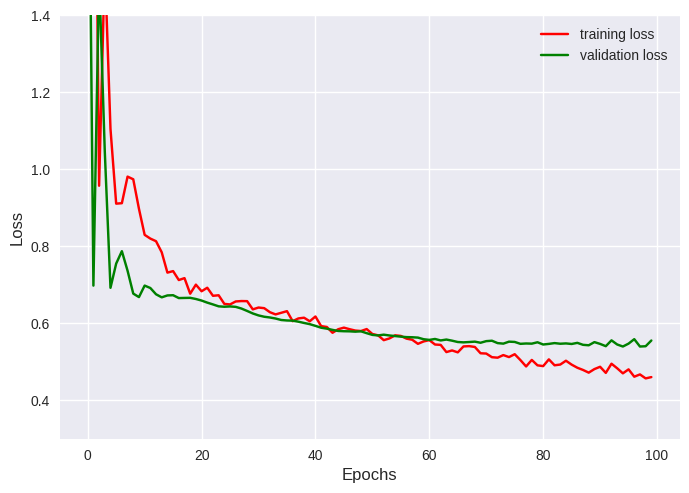

In [40]:
plt.style.use("seaborn")
plt.plot(Resnethist.history['loss'],label="training loss",c='red')
plt.plot(Resnethist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.ylim(0.3,1.4)
plt.legend()
plt.show()

In [41]:
plt.savefig("plot/First_Second_loss.eps")

<Figure size 800x550 with 0 Axes>

/tmp/ipykernel_2181243/3195569237.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


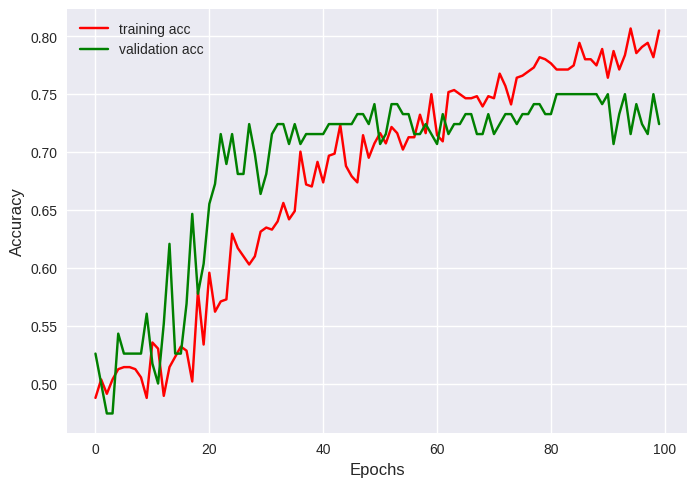

In [42]:
plt.style.use("seaborn")
plt.plot(Resnethist.history['acc'],label="training acc",c='red')
plt.plot(Resnethist.history['val_acc'],label="validation acc",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()

In [43]:
plt.savefig("plot/First_Second_Accuracy.eps")

<Figure size 800x550 with 0 Axes>

4/4 [==============================] - 3s 590ms/step
confusion Matrix:
[[42 15]
 [13 50]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 1       0.76      0.74      0.75        57
 Trimester 2       0.77      0.79      0.78        63

    accuracy                           0.77       120
   macro avg       0.77      0.77      0.77       120
weighted avg       0.77      0.77      0.77       120

**********************************************
Accuracy Score : 0.7666666666666667
**********************************************
F1 Score : 0.7812500000000001
**********************************************
Class Wise Accuracy :
Trimester 1 Accuracy : 73.68421052631578
Trimester 2 Accuracy : 79.36507936507937
**********************************************
ROC_AUC Score: 0.7652464494569757
**********************************************
Cohen_kappa score: 0.5313807531380753


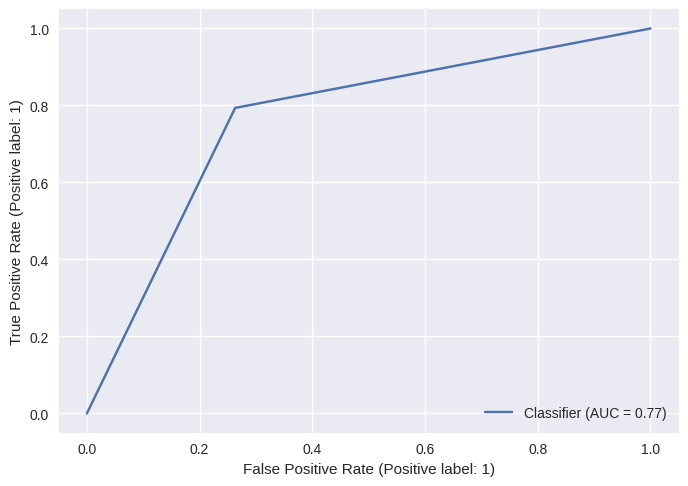

In [44]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 1','Trimester 2'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 1 Accuracy :", class_wise_acc[0]*100)
print("Trimester 2 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

# **VGG 16**

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model

base_model = VGG16(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

In [30]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(20, activation='relu')(x)
x = layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00009), loss = 'binary_crossentropy',metrics = ['acc'])

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [32]:
vgghist = model.fit(X_train,y_train, validation_data= (X_valid,y_valid), steps_per_epoch = 1, epochs = 100, shuffle=True)
#Here 194 train Data size and 32 Test Data size

Epoch 1/100
1/1 [==============================] - 22s 22s/step - loss: 0.7749 - acc: 0.4823 - val_loss: 0.7918 - val_acc: 0.5259
Epoch 2/100
1/1 [==============================] - 22s 22s/step - loss: 0.9102 - acc: 0.5035 - val_loss: 0.6896 - val_acc: 0.5172
Epoch 3/100
1/1 [==============================] - 21s 21s/step - loss: 0.7567 - acc: 0.4628 - val_loss: 0.6841 - val_acc: 0.5517
Epoch 4/100
1/1 [==============================] - 20s 20s/step - loss: 0.6811 - acc: 0.5798 - val_loss: 0.6697 - val_acc: 0.6293
Epoch 5/100
1/1 [==============================] - 22s 22s/step - loss: 0.6696 - acc: 0.5798 - val_loss: 0.6706 - val_acc: 0.5259
Epoch 6/100
1/1 [==============================] - 21s 21s/step - loss: 0.6704 - acc: 0.5833 - val_loss: 0.6835 - val_acc: 0.5862
Epoch 7/100
1/1 [==============================] - 21s 21s/step - loss: 0.6903 - acc: 0.5816 - val_loss: 0.6727 - val_acc: 0.5259
Epoch 8/100
1/1 [==============================] - 21s 21s/step - loss: 0.6777 - acc: 0.57

/tmp/ipykernel_2166802/3949776168.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


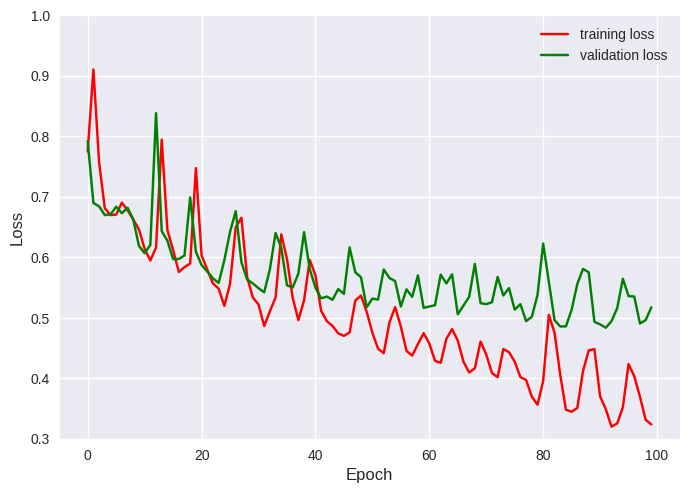

In [33]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

y1 = vgghist.history["loss"]
y2 = vgghist.history["val_loss"]

plt.style.use("seaborn")
plt.plot(vgghist.history['loss'],label="training loss",c='red')
plt.plot(vgghist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
#plt.plot(smooth(y1,10), 'r-', lw=2)
#plt.plot(smooth(y2,10), 'g-', lw=2)
plt.ylim(0.3,1.0)
plt.legend()
plt.show()

In [34]:
plt.savefig("plot/First_Second_loss_vgg.eps")

<Figure size 800x550 with 0 Axes>

/tmp/ipykernel_2166802/2437058007.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


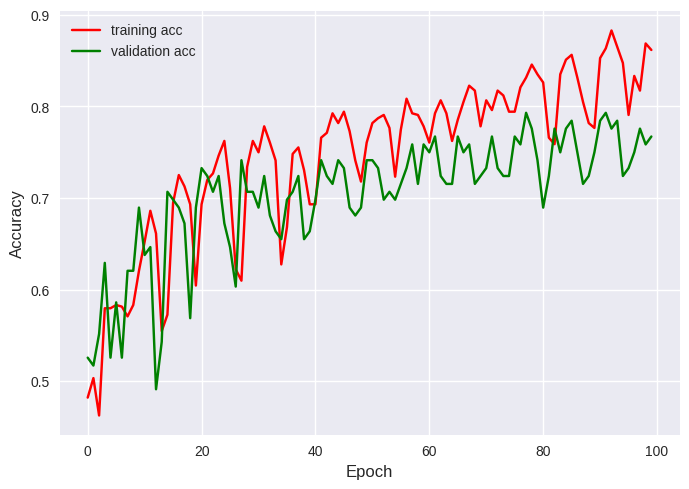

In [35]:
plt.style.use("seaborn")
plt.plot(vgghist.history['acc'],label="training acc",c='red')
plt.plot(vgghist.history['val_acc'],label="validation acc",c='green')
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()

In [36]:
plt.savefig("plot/First_Second_acc_vgg.eps")

<Figure size 800x550 with 0 Axes>

4/4 [==============================] - 6s 1s/step
confusion Matrix:
[[53  4]
 [24 39]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 1       0.69      0.93      0.79        57
 Trimester 2       0.91      0.62      0.74        63

    accuracy                           0.77       120
   macro avg       0.80      0.77      0.76       120
weighted avg       0.80      0.77      0.76       120

**********************************************
Accuracy Score : 0.7666666666666667
**********************************************
F1 Score : 0.7358490566037736
**********************************************
Class Wise Accuracy :
Trimester 1 Accuracy : 92.98245614035088
Trimester 2 Accuracy : 61.904761904761905
**********************************************
ROC_AUC Score: 0.7744360902255639
**********************************************
Cohen_kappa score: 0.5398520953163517


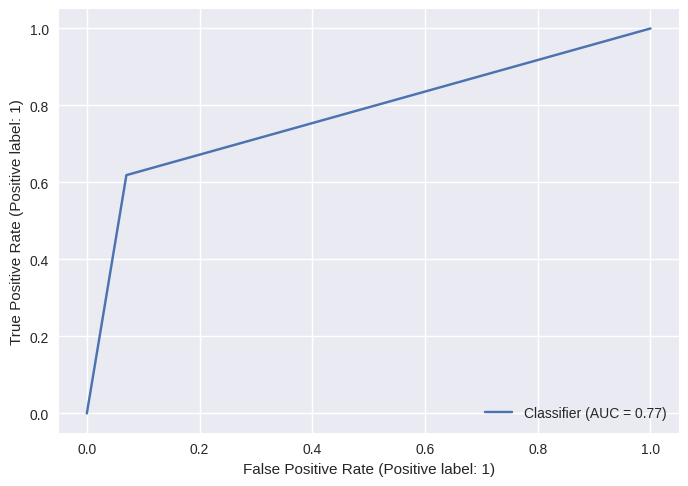

In [37]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 1','Trimester 2'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 1 Accuracy :", class_wise_acc[0]*100)
print("Trimester 2 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [38]:
df = pd.DataFrame({'loss' : vgghist.history["loss"],
                                'val_loss' : vgghist.history["val_loss"],
                                'accuracy' : vgghist.history["acc"],
                               "val_accuracy": vgghist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('First_Second/vgghist_12.csv')


#**Efficient Net**

In [35]:
!pip install -U efficientnet

In [11]:
import efficientnet.keras as efn

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model

base_model = efn.EfficientNetB0(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

In [12]:
from tensorflow.keras import optimizers

In [42]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.8)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.00008), loss = 'binary_crossentropy',metrics = ['acc'])

In [43]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                           

 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 56, 56, 144)  1296       ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_bn (BatchNormalization  (None, 56, 56, 144)  576        ['block2b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2b_activation (Activation  (None, 56, 56, 144)  0          ['block2b_bn[0][0]']             
 )                                                                                                
          

                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 240)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_se_reduce (Conv2D)     (None, 1, 1, 10)     2410        ['block3b_se_reshape[0][0]']     
                                                                                                  
 block3b_se_expand (Conv2D)     (None, 1, 1, 240)    2640        ['block3b_se_reduce[0][0]']      
                                                                                                  
 block3b_s

 block4b_se_excite (Multiply)   (None, 14, 14, 480)  0           ['block4b_activation[0][0]',     
                                                                  'block4b_se_expand[0][0]']      
                                                                                                  
 block4b_project_conv (Conv2D)  (None, 14, 14, 80)   38400       ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 14, 14, 80)  320         ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (FixedDropout)    (None, 14, 14, 80)   0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_a

 block5a_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5b_expand_conv (Conv2D)   (None, 14, 14, 672)  75264       ['block5a_project_bn[0][0]']     
                                                                                                  
 block5b_expand_bn (BatchNormal  (None, 14, 14, 672)  2688       ['block5b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5b_expand_activation (Act  (None, 14, 14, 672)  0          ['block5b_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block6a_expand_bn (BatchNormal  (None, 14, 14, 672)  2688       ['block6a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6a_expand_activation (Act  (None, 14, 14, 672)  0          ['block6a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6a_dwconv (DepthwiseConv2  (None, 7, 7, 672)   16800       ['block6a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6a_bn (BatchNormalization  (None, 7, 7, 672)   2688        ['block6a_dwconv[0][0]']         
 )        

 )                                                                                                
                                                                                                  
 block6c_activation (Activation  (None, 7, 7, 1152)  0           ['block6c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6c_se_squeeze (GlobalAver  (None, 1152)        0           ['block6c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6c_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block6c_se_squeeze[0][0]']     
                                                                                                  
 block6c_s

 block7a_se_squeeze (GlobalAver  (None, 1152)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block7a_se_squeeze[0][0]']     
                                                                                                  
 block7a_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block7a_se_reshape[0][0]']     
                                                                                                  
 block7a_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block7a_se_reduce[0][0]']      
                                                                                                  
 block7a_se_excite (Multiply)   (None, 7, 7, 1152)   0           ['block7a_activation[0][0]',     
          

In [44]:
EnetB0hist = model.fit(X_train,y_train, validation_data = (X_valid,y_valid), steps_per_epoch = 1, epochs = 100)


Epoch 1/100
1/1 [==============================] - 11s 11s/step - loss: 0.9438 - acc: 0.5000 - val_loss: 1.7244 - val_acc: 0.4828
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 1.7133 - acc: 0.5372 - val_loss: 1.2210 - val_acc: 0.5259
Epoch 3/100
1/1 [==============================] - 6s 6s/step - loss: 1.3529 - acc: 0.4965 - val_loss: 0.7545 - val_acc: 0.5431
Epoch 4/100
1/1 [==============================] - 6s 6s/step - loss: 0.9950 - acc: 0.5248 - val_loss: 0.6446 - val_acc: 0.6293
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 0.7368 - acc: 0.6064 - val_loss: 0.5958 - val_acc: 0.6552
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 0.6817 - acc: 0.6330 - val_loss: 0.6242 - val_acc: 0.6293
Epoch 7/100
1/1 [==============================] - 6s 6s/step - loss: 0.6592 - acc: 0.6046 - val_loss: 0.5600 - val_acc: 0.7069
Epoch 8/100
1/1 [==============================] - 6s 6s/step - loss: 0.5902 - acc: 0.6915 - val_loss:

/tmp/ipykernel_2166802/3831535719.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


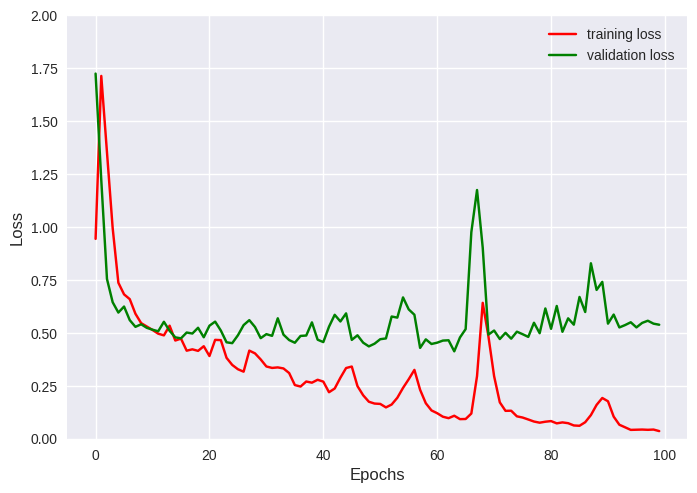

In [45]:
plt.style.use("seaborn")
plt.plot(EnetB0hist.history['loss'],label="training loss",c='red')
plt.plot(EnetB0hist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.ylim(0,2)
plt.legend()
plt.show()

In [46]:
plt.savefig("plot/First_Second_loss_enetb0.eps")

<Figure size 800x550 with 0 Axes>

/tmp/ipykernel_2166802/3018052001.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/tmp/ipykernel_2166802/3018052001.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


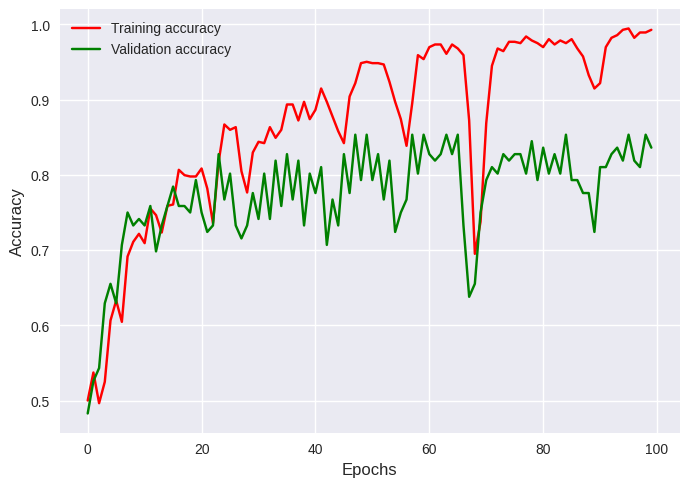

In [47]:
plt.style.use("seaborn")
#plt.plot(vgghist.history['acc'],label="training acc",c='red')
#plt.plot(vgghist.history['val_acc'],label="validation acc",c='green')

plt.plot(EnetB0hist.history['acc'],label="Training accuracy",c='red')
plt.plot(EnetB0hist.history['val_acc'],label="Validation accuracy",c='green')
y1 = EnetB0hist.history["acc"]
y2 = EnetB0hist.history["val_acc"]
plt.style.use("seaborn")
#plt.plot(vgghist.history['loss'],label="training loss",c='red')
#plt.plot(vgghist.history['val_loss'],label="validation loss",c='green')
#plt.plot(smooth(y1,10), 'r-', lw=2)
#plt.plot(smooth(y2,10), 'g-', lw=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()

In [48]:
plt.savefig("plot/First_Second_acc_enetb0.eps")

<Figure size 800x550 with 0 Axes>

4/4 [==============================] - 2s 271ms/step
confusion Matrix:
[[48  9]
 [10 53]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 1       0.83      0.84      0.83        57
 Trimester 2       0.85      0.84      0.85        63

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120

**********************************************
Accuracy Score : 0.8416666666666667
**********************************************
F1 Score : 0.848
**********************************************
Class Wise Accuracy :
Trimester 1 Accuracy : 84.21052631578947
Trimester 2 Accuracy : 84.12698412698413
**********************************************
ROC_AUC Score: 0.8416875522138679
**********************************************
Cohen_kappa score: 0.682804674457429


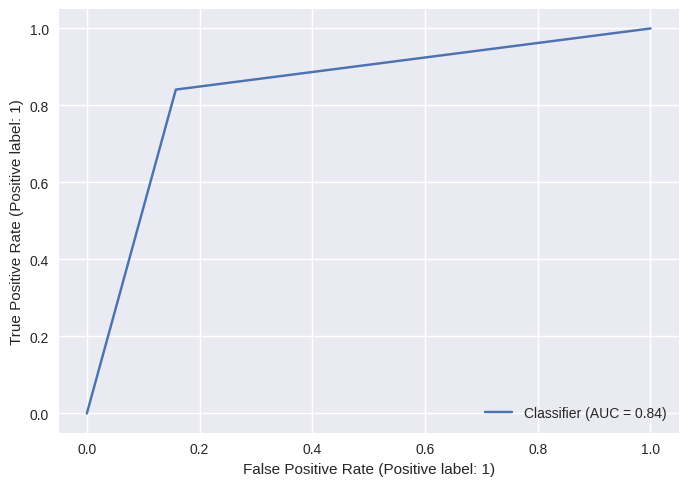

In [49]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 1','Trimester 2'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 1 Accuracy :", class_wise_acc[0]*100)
print("Trimester 2 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [50]:
df = pd.DataFrame({'loss' :EnetB0hist.history["loss"],
                                'val_loss' : EnetB0hist.history["val_loss"],
                                'accuracy' : EnetB0hist.history["acc"],
                               "val_accuracy": EnetB0hist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('First_Second/EnetB0hist_12.csv')

# **Efficient Net B7**

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model

base_model = efn.EfficientNetB7(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

2023-03-13 04:46:41.054618: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-03-13 04:46:41.054640: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-03-13 04:46:41.055423: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.0006), loss = 'binary_crossentropy',metrics = ['acc'])

In [15]:
EnetB7hist = model.fit(X_train,y_train, validation_data = (X_valid,y_valid), steps_per_epoch = 1, epochs = 100, shuffle=True)


Epoch 1/100
1/1 [==============================] - 58s 58s/step - loss: 0.8084 - acc: 0.5177 - val_loss: 7.8789 - val_acc: 0.5345
Epoch 2/100
1/1 [==============================] - 41s 41s/step - loss: 8.3433 - acc: 0.5745 - val_loss: 94.6400 - val_acc: 0.4741
Epoch 3/100
1/1 [==============================] - 41s 41s/step - loss: 90.7220 - acc: 0.5000 - val_loss: 1.6180 - val_acc: 0.6810
Epoch 4/100
1/1 [==============================] - 41s 41s/step - loss: 3.8136 - acc: 0.5957 - val_loss: 16.1063 - val_acc: 0.4741
Epoch 5/100
1/1 [==============================] - 41s 41s/step - loss: 13.3056 - acc: 0.5089 - val_loss: 6.0121 - val_acc: 0.5259
Epoch 6/100
1/1 [==============================] - 43s 43s/step - loss: 6.4133 - acc: 0.5106 - val_loss: 7.0302 - val_acc: 0.4741
Epoch 7/100
1/1 [==============================] - 41s 41s/step - loss: 7.4747 - acc: 0.5124 - val_loss: 1.0695 - val_acc: 0.5690
Epoch 8/100
1/1 [==============================] - 41s 41s/step - loss: 1.7052 - acc: 

1/1 [==============================] - 43s 43s/step - loss: 0.5895 - acc: 0.6383 - val_loss: 0.5224 - val_acc: 0.7586
Epoch 64/100
1/1 [==============================] - 43s 43s/step - loss: 0.5737 - acc: 0.6720 - val_loss: 0.5165 - val_acc: 0.7414
Epoch 65/100
1/1 [==============================] - 44s 44s/step - loss: 0.5731 - acc: 0.6684 - val_loss: 0.5195 - val_acc: 0.8017
Epoch 66/100
1/1 [==============================] - 42s 42s/step - loss: 0.5527 - acc: 0.7004 - val_loss: 0.5525 - val_acc: 0.7328
Epoch 67/100
1/1 [==============================] - 44s 44s/step - loss: 0.5759 - acc: 0.6826 - val_loss: 0.5840 - val_acc: 0.6897
Epoch 68/100
1/1 [==============================] - 42s 42s/step - loss: 0.5978 - acc: 0.6223 - val_loss: 0.5473 - val_acc: 0.7155
Epoch 69/100
1/1 [==============================] - 41s 41s/step - loss: 0.6055 - acc: 0.6596 - val_loss: 0.5401 - val_acc: 0.7759
Epoch 70/100
1/1 [==============================] - 43s 43s/step - loss: 0.5749 - acc: 0.6862 - 

/tmp/ipykernel_2181243/3118522537.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


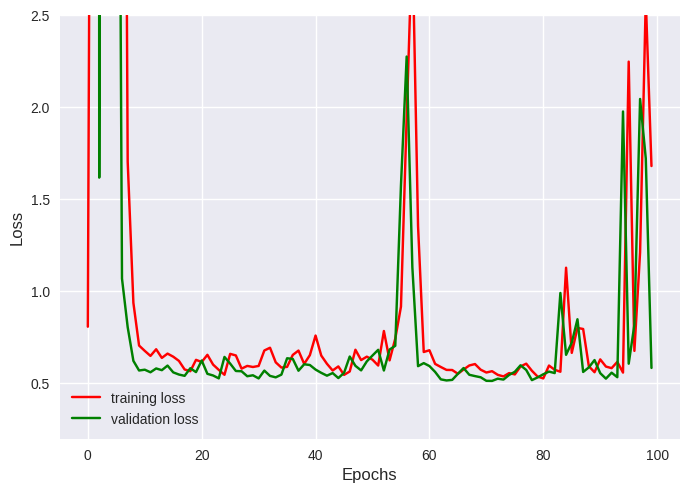

In [16]:
plt.style.use("seaborn")
plt.plot(EnetB7hist.history['loss'],label="training loss",c='red')
plt.plot(EnetB7hist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.ylim(0.2,2.5)
plt.legend()
plt.show()

In [17]:
plt.savefig("plot/First_Second_loss_enetb7.eps")

<Figure size 800x550 with 0 Axes>

/tmp/ipykernel_2181243/1609416227.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


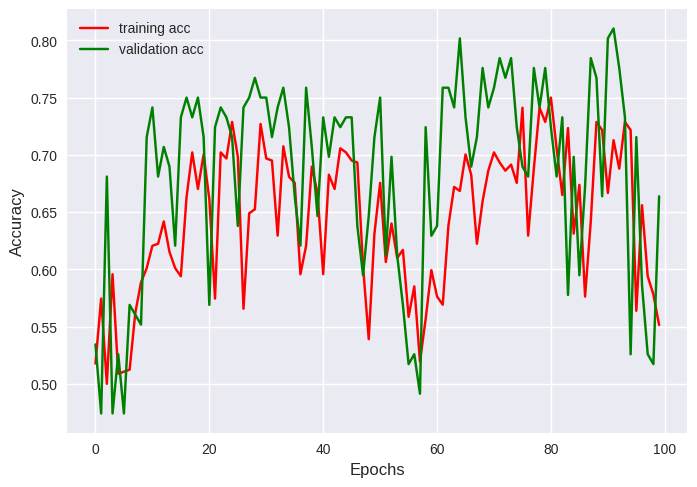

In [18]:
plt.style.use("seaborn")
plt.plot(EnetB7hist.history['acc'],label="training acc",c='red')
plt.plot(EnetB7hist.history['val_acc'],label="validation acc",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()

In [19]:
plt.savefig("plot/First_Second_acc_enetb7.eps")

<Figure size 800x550 with 0 Axes>

4/4 [==============================] - 10s 2s/step
confusion Matrix:
[[56  1]
 [45 18]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 1       0.55      0.98      0.71        57
 Trimester 2       0.95      0.29      0.44        63

    accuracy                           0.62       120
   macro avg       0.75      0.63      0.57       120
weighted avg       0.76      0.62      0.57       120

**********************************************
Accuracy Score : 0.6166666666666667
**********************************************
F1 Score : 0.43902439024390244
**********************************************
Class Wise Accuracy :
Trimester 1 Accuracy : 98.24561403508771
Trimester 2 Accuracy : 28.57142857142857
**********************************************
ROC_AUC Score: 0.6340852130325814
**********************************************
Cohen_kappa score: 0.25866236905721185


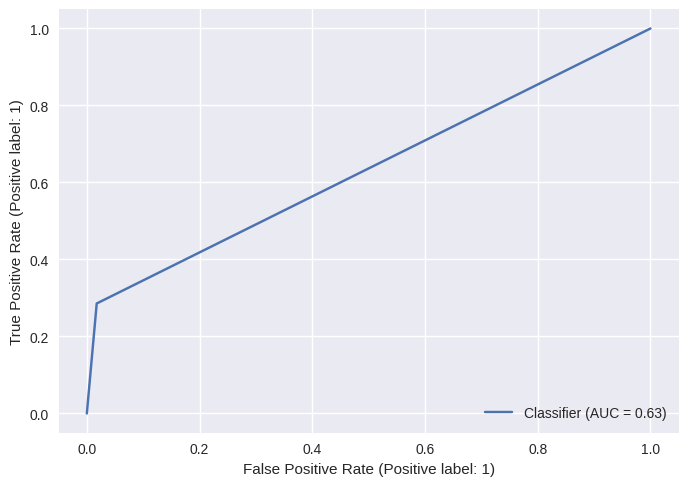

In [20]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 1','Trimester 2'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 1 Accuracy :", class_wise_acc[0]*100)
print("Trimester 2 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [21]:
df = pd.DataFrame({'loss' : EnetB7hist.history["loss"],
                                'val_loss' : EnetB7hist.history["val_loss"],
                                'accuracy' : EnetB7hist.history["acc"],
                               "val_accuracy": EnetB7hist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('First_Second/EnetB7hist_12.csv')

# **Inception**

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (224,224, 3), include_top = False, weights = 'imagenet')


for layer in base_model.layers:
    layer.trainable = False

In [23]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dense(100, activation='relu')(x)
#x = layers.Dense(20, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output


model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00008), loss = 'binary_crossentropy',metrics = ['acc'])

In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [25]:
Inceptionhist = model.fit(X_train,y_train, validation_data= (X_valid,y_valid), steps_per_epoch = 1, epochs = 100)


Epoch 1/100
1/1 [==============================] - 11s 11s/step - loss: 1.0005 - acc: 0.5355 - val_loss: 17.8008 - val_acc: 0.5259
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 18.2871 - acc: 0.5000 - val_loss: 12.2797 - val_acc: 0.4741
Epoch 3/100
1/1 [==============================] - 5s 5s/step - loss: 11.5915 - acc: 0.5000 - val_loss: 0.7482 - val_acc: 0.6897
Epoch 4/100
1/1 [==============================] - 5s 5s/step - loss: 0.7830 - acc: 0.6950 - val_loss: 2.0078 - val_acc: 0.5345
Epoch 5/100
1/1 [==============================] - 6s 6s/step - loss: 1.9241 - acc: 0.5372 - val_loss: 2.5615 - val_acc: 0.4741
Epoch 6/100
1/1 [==============================] - 6s 6s/step - loss: 2.3221 - acc: 0.5035 - val_loss: 0.6776 - val_acc: 0.6293
Epoch 7/100
1/1 [==============================] - 7s 7s/step - loss: 0.7158 - acc: 0.6454 - val_loss: 0.6869 - val_acc: 0.6897
Epoch 8/100
1/1 [==============================] - 7s 7s/step - loss: 0.6704 - acc: 0.6826 - val_l

1/1 [==============================] - 6s 6s/step - loss: 0.2659 - acc: 0.8723 - val_loss: 0.9732 - val_acc: 0.5776
Epoch 65/100
1/1 [==============================] - 7s 7s/step - loss: 0.4958 - acc: 0.7340 - val_loss: 0.9167 - val_acc: 0.5603
Epoch 66/100
1/1 [==============================] - 6s 6s/step - loss: 0.4650 - acc: 0.7411 - val_loss: 0.5512 - val_acc: 0.7672
Epoch 67/100
1/1 [==============================] - 5s 5s/step - loss: 0.2843 - acc: 0.8936 - val_loss: 0.5323 - val_acc: 0.7414
Epoch 68/100
1/1 [==============================] - 5s 5s/step - loss: 0.2202 - acc: 0.9202 - val_loss: 0.4648 - val_acc: 0.8276
Epoch 69/100
1/1 [==============================] - 6s 6s/step - loss: 0.1740 - acc: 0.9734 - val_loss: 0.4825 - val_acc: 0.7759
Epoch 70/100
1/1 [==============================] - 7s 7s/step - loss: 0.1408 - acc: 0.9504 - val_loss: 0.5053 - val_acc: 0.8017
Epoch 71/100
1/1 [==============================] - 6s 6s/step - loss: 0.1421 - acc: 0.9592 - val_loss: 0.6214

/tmp/ipykernel_2181243/202407790.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


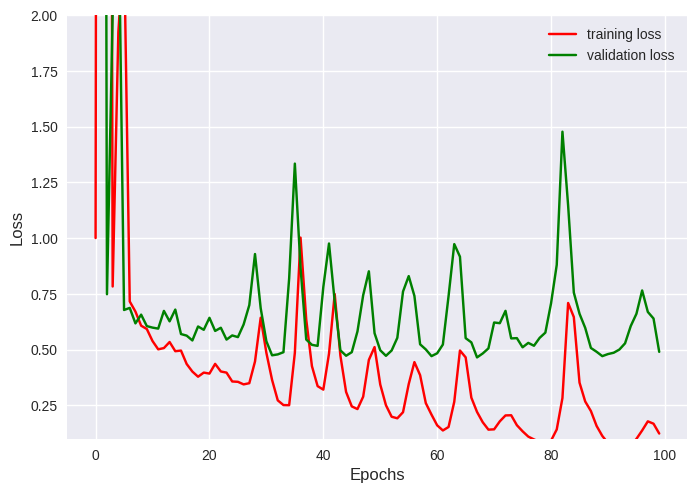

In [26]:
plt.style.use("seaborn")
plt.plot(Inceptionhist.history['loss'],label="training loss",c='red')
plt.plot(Inceptionhist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.ylim(0.1,2)
plt.legend()
plt.show()

In [27]:
plt.savefig("plot/First_Second_loss_Inv3.eps")

<Figure size 800x550 with 0 Axes>

/tmp/ipykernel_2181243/1888920961.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


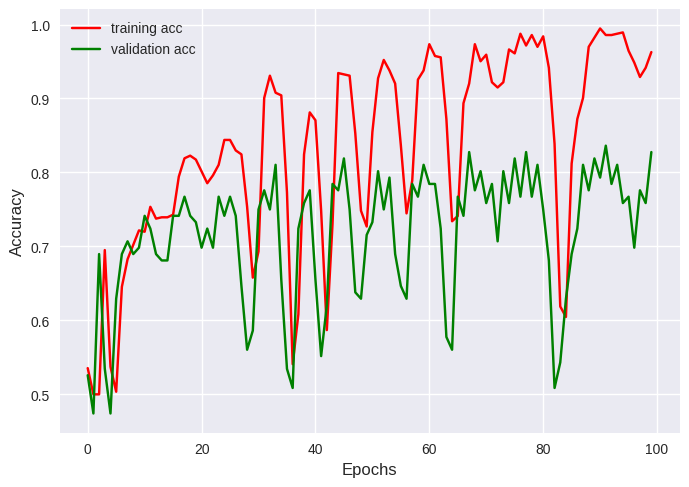

In [28]:
plt.style.use("seaborn")
plt.plot(Inceptionhist.history['acc'],label="training acc",c='red')
plt.plot(Inceptionhist.history['val_acc'],label="validation acc",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()

In [29]:
plt.savefig("plot/First_Second_acc_Inv3.eps")

<Figure size 800x550 with 0 Axes>

/tmp/ipykernel_2181243/2473610800.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


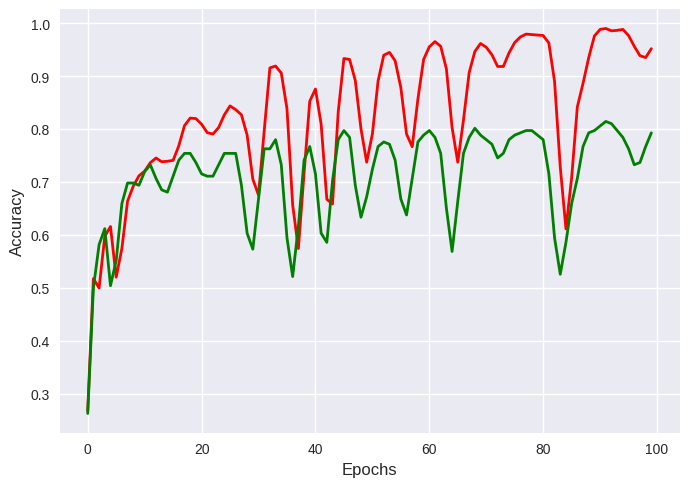

In [30]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

y1 = Inceptionhist.history['acc']
y2 = Inceptionhist.history['val_acc']

plt.style.use("seaborn")
#plt.plot(vgghist.history['loss'],label="training loss",c='red')
#plt.plot(vgghist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.plot(smooth(y1,2), 'r-', lw=2)
plt.plot(smooth(y2,2), 'g-', lw=2)
plt.legend()
plt.show()

4/4 [==============================] - 2s 225ms/step
confusion Matrix:
[[52  5]
 [18 45]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 1       0.74      0.91      0.82        57
 Trimester 2       0.90      0.71      0.80        63

    accuracy                           0.81       120
   macro avg       0.82      0.81      0.81       120
weighted avg       0.83      0.81      0.81       120

**********************************************
Accuracy Score : 0.8083333333333333
**********************************************
F1 Score : 0.7964601769911505
**********************************************
Class Wise Accuracy :
Trimester 1 Accuracy : 91.22807017543859
Trimester 2 Accuracy : 71.42857142857143
**********************************************
ROC_AUC Score: 0.8132832080200502
**********************************************
Cohen_kappa score: 0.6198347107438016


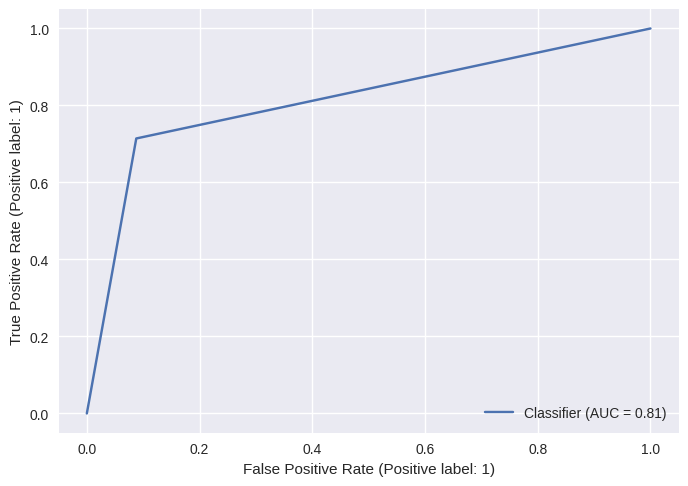

In [31]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 1','Trimester 2'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 1 Accuracy :", class_wise_acc[0]*100)
print("Trimester 2 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [32]:
df = pd.DataFrame({'loss' : Inceptionhist.history["loss"],
                                'val_loss' : Inceptionhist.history["val_loss"],
                                'accuracy' : Inceptionhist.history["acc"],
                               "val_accuracy": Inceptionhist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('First_Second/Inceptionhist_12.csv')
